In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv('../data/coin_Bitcoin.csv')
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [23]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

print("Basic Information:")
data.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991 entries, 2013-04-29 23:59:59 to 2021-07-06 23:59:59
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   High       2991 non-null   float64
 4   Low        2991 non-null   float64
 5   Open       2991 non-null   float64
 6   Close      2991 non-null   float64
 7   Volume     2991 non-null   float64
 8   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 233.7+ KB


In [24]:
data['Price_1M_Prior'] = data['Close'].shift(30)  # 1 month prior (assuming ~30 days in a month)
data['Price_1W_Prior'] = data['Close'].shift(7)   # 1 week prior
data['Price_2D_Prior'] = data['Close'].shift(2)   # 2 days prior
data['Price_1D_Prior'] = data['Close'].shift(1)   # 1 day prior
data['Price_Tomorrow'] = data['Close'].shift(-1)  # Next day (price tomorrow)

# Moving Averages
data['20_MA'] = data['Close'].rolling(window=20).mean()  # 20-day moving average
data['50_MA'] = data['Close'].rolling(window=50).mean()  # 50-day moving average

data.dropna(inplace=True)

In [25]:
print("\nStatistical Summary:")
data.describe()


Statistical Summary:


,SNo,High,Low,Open,Close,Volume,Marketcap,Price_1M_Prior,Price_1W_Prior,Price_2D_Prior,Price_1D_Prior,Price_Tomorrow,20_MA,50_MA
count,2941.000000,2941.000000,2941.000000,2941.000000,2941.000000,2.941000e+03,2.941000e+03,2941.000000,2941.000000,2941.000000,2941.000000,2941.000000,2941.000000,2941.000000
mean,1520.000000,6996.572432,6582.974082,6800.610530,6811.781586,1.108274e+10,1.226908e+11,6452.366120,6729.716563,6788.376526,6800.341093,6823.387671,6701.701669,6517.683761
std,849.137896,11696.864449,10918.266733,11340.482146,11350.180817,1.899379e+10,2.119439e+11,10990.404152,11273.383775,11328.465958,11339.975567,11360.763718,11193.793940,10911.563573
min,50.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08,68.431000,68.431000,68.431000,68.431000,68.431000,86.568520,95.241312
25%,785.000000,449.403015,434.230988,441.415985,441.462006,3.397780e+07,6.410381e+09,433.091003,438.885986,440.670990,441.389008,442.401001,441.885298,429.304979
50%,1520.000000,2616.719971,2480.959961,2547.790039,2548.290039,1.157290e+09,4.178842e+10,2175.469971,2511.810059,2529.449951,2539.320068,2552.449951,2492.070007,2341.249595
75%,2255.000000,8809.303991,8374.322975,8619.669922,8658.554180,1.651660e+10,1.518902e+11,8367.847773,8598.309570,8630.650391,8657.642939,8659.487756,8589.101489,8488.511377
max,2990.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12,63503.457930,63503.457930,63503.457930,63503.457930,63503.457930,59618.642612,57132.158566


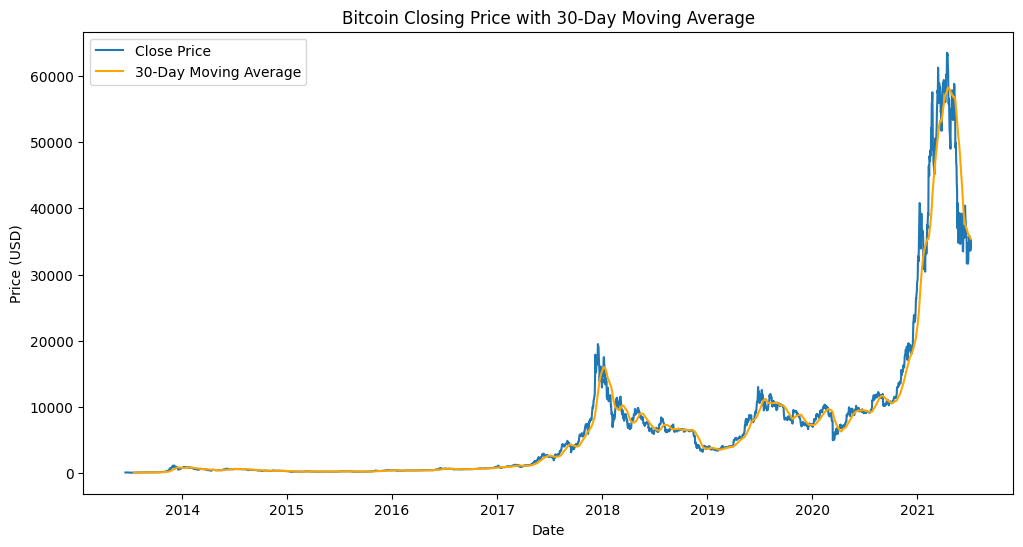

In [26]:
data['30_day_MA'] = data['Close'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['30_day_MA'], label='30-Day Moving Average', color='orange')
plt.title('Bitcoin Closing Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

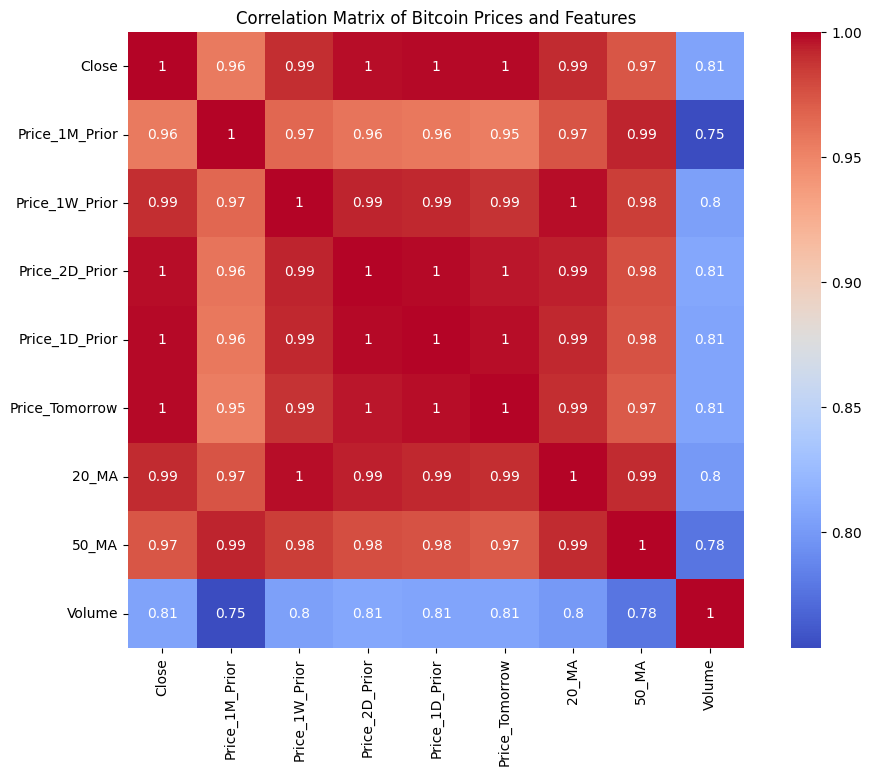

In [27]:
# will add more features to the data
# maybe add market indicators (btc dominance, trading volume, funding rates)
# add on-chain data as well (transaction count, hash rate, etc.)
# macroeconomic indicators (inflation rate, interest rates, etc.)
# sentiment analysis?

features = ['Close', 'Price_1M_Prior', 'Price_1W_Prior', 'Price_2D_Prior', 'Price_1D_Prior', 
            'Price_Tomorrow', '20_MA', '50_MA', 'Volume']
correlation_matrix = data[features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Bitcoin Prices and Features')
plt.show()